# Classifying Handwrittern Images using Convolutional Neural Network

## Importing Necessory Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sb
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

## Downloading dataset

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
listt=['zero','one','two','three','four','five','six','seven','eight','nine','ten']
y_train[0]

5

## Plotting the some of the images

In [5]:
def plot_pic(x,y,index):
  plt.figure(figsize=(10,2))
  plt.imshow(x[index])
  plt.xlabel(listt[y[index]])

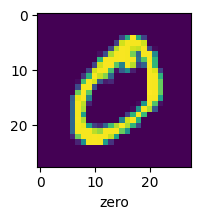

In [6]:
plot_pic(x_train,y_train,1)

## Scaling the Images

In [7]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

## Develop a Convolutional neural network using keras

In [8]:
cnn=keras.Sequential([

    #CNN
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [9]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Got an accuracy of 99.99 percent on training and testing dataset

In [10]:
cnn.fit(x_train_scaled,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 11s 4ms/step - loss: 0.1602 - accuracy: 0.9514
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9846
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0349 - accuracy: 0.9893
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0254 - accuracy: 0.9922
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0155 - accuracy: 0.9950
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0116 - accuracy: 0.9964
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - accuracy: 0.9968
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

In [11]:
cnn.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0389 - accuracy: 0.9927


[0.038877326995134354, 0.9926999807357788]

In [12]:
y_pred=cnn.predict(x_test_scaled)
predicted=[np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 3ms/step


In [13]:
predicted[:5],y_test[:5]

([7, 2, 1, 0, 4], array([7, 2, 1, 0, 4], dtype=uint8))

# Got precision , recall , and F1 score approximately equals to 100 percent

In [14]:
print(cr(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

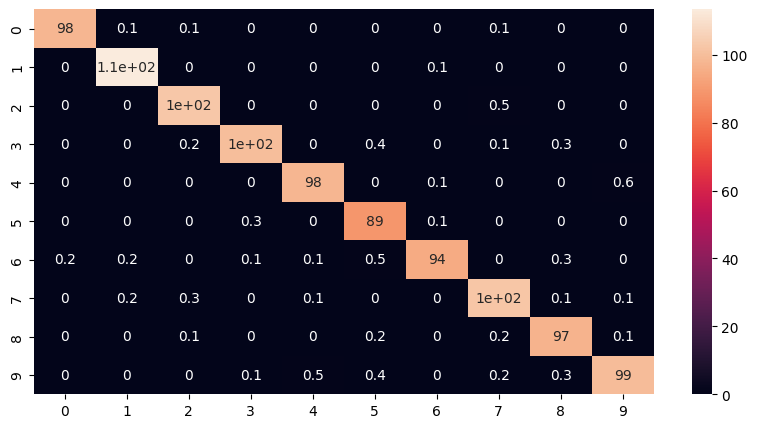

In [16]:
cmm=cm(y_test,predicted)
cmm=cmm/10
plt.figure(figsize=(10,5))
plt.xlabel("Predicted")
plt.ylabel("truth")
sb.heatmap(cmm,annot=True)